In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Code Files\Data Files\realtor-data.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
df.drop(['brokered_by', 'status', 'prev_sold_date', 'state', 'street', 'city', 'acre_lot'], axis=1, inplace=True)
df = df.drop_duplicates().dropna()
df.rename(columns={"house_size": "sqft"}, inplace=True)

In [4]:
df = df[df['bed'] <= 20]
df = df[df['price'] <= 125000000]
df = df[df['sqft'] <= 60000]
df = df[df['bath'] <= 30]

In [5]:
log_features = df.columns
for col in log_features:
    df[col] = np.log1p(df[col])

In [6]:
df = df[df['price'] > 5]

In [7]:
x = df.drop('price', axis=1)
y = df['price']

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

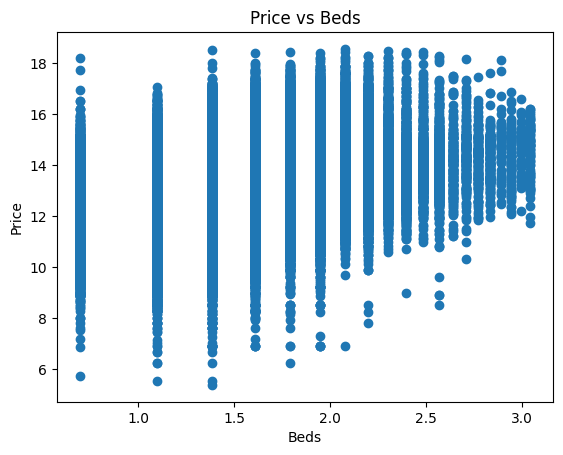

In [9]:
plt.scatter(df['bed'], df['price'])
plt.xlabel('Beds')
plt.ylabel('Price')
plt.title('Price vs Beds')
plt.show()

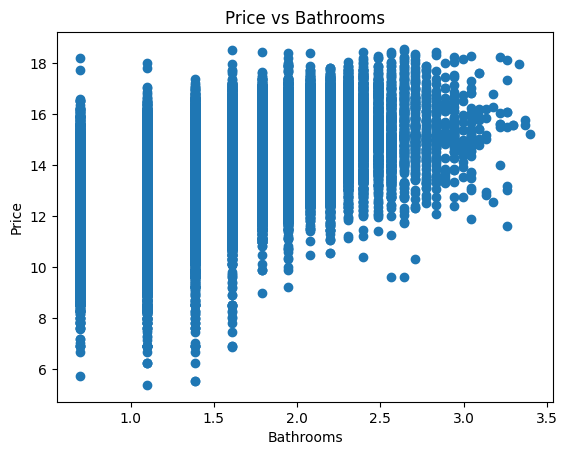

In [10]:
plt.scatter(df['bath'], df['price'])
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price vs Bathrooms')
plt.show()

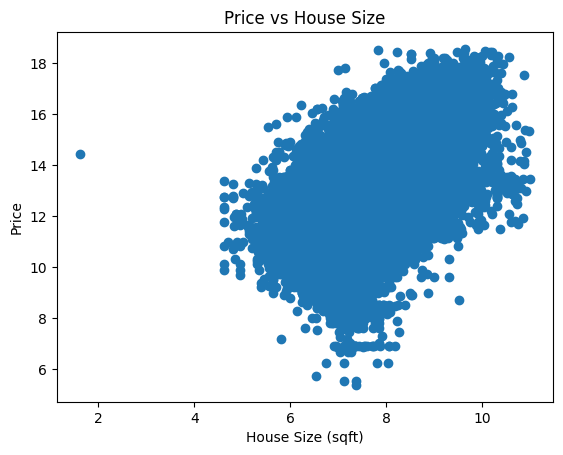

In [11]:
plt.scatter(df['sqft'], df['price'])
plt.xlabel('House Size (sqft)')
plt.ylabel('Price')
plt.title('Price vs House Size')
plt.show()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [13]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [14]:
grid = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid.fit(x_train, y_train)
grid.best_params_

{'fit_intercept': True, 'positive': False}

In [15]:
model = LinearRegression(fit_intercept=True, positive=False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

In [17]:
mse

0.44812357304437006

In [18]:
mae

0.5017090218461518

In [19]:
f'Accuracy{r2 * 100: .2f}%'

'Accuracy 37.27%'

In [20]:
df.head(20)

,price,bed,bath,zip_code,sqft
0,11.561725,1.386294,1.098612,6.400257,6.825460
1,11.289794,1.609438,1.098612,6.400257,7.331715
2,11.112463,1.098612,0.693147,6.679599,6.618739
3,11.884496,1.609438,1.098612,6.595781,7.496097
5,12.095147,1.609438,1.386294,6.418365,7.832411
6,10.819798,1.386294,0.693147,6.461468,7.621195
7,11.178864,1.386294,1.098612,6.595781,6.957497
8,11.512935,1.098612,0.693147,6.594413,6.996681
9,12.611541,1.791759,1.386294,6.508769,8.594895
10,11.396403,1.386294,1.098612,6.496775,7.009409
